In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import tsfel

In [7]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test.shape)
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))


# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


(54, 500, 3)
Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


1.1

Testing data shape:  (126,)
Testing data shape:  (126, 1)


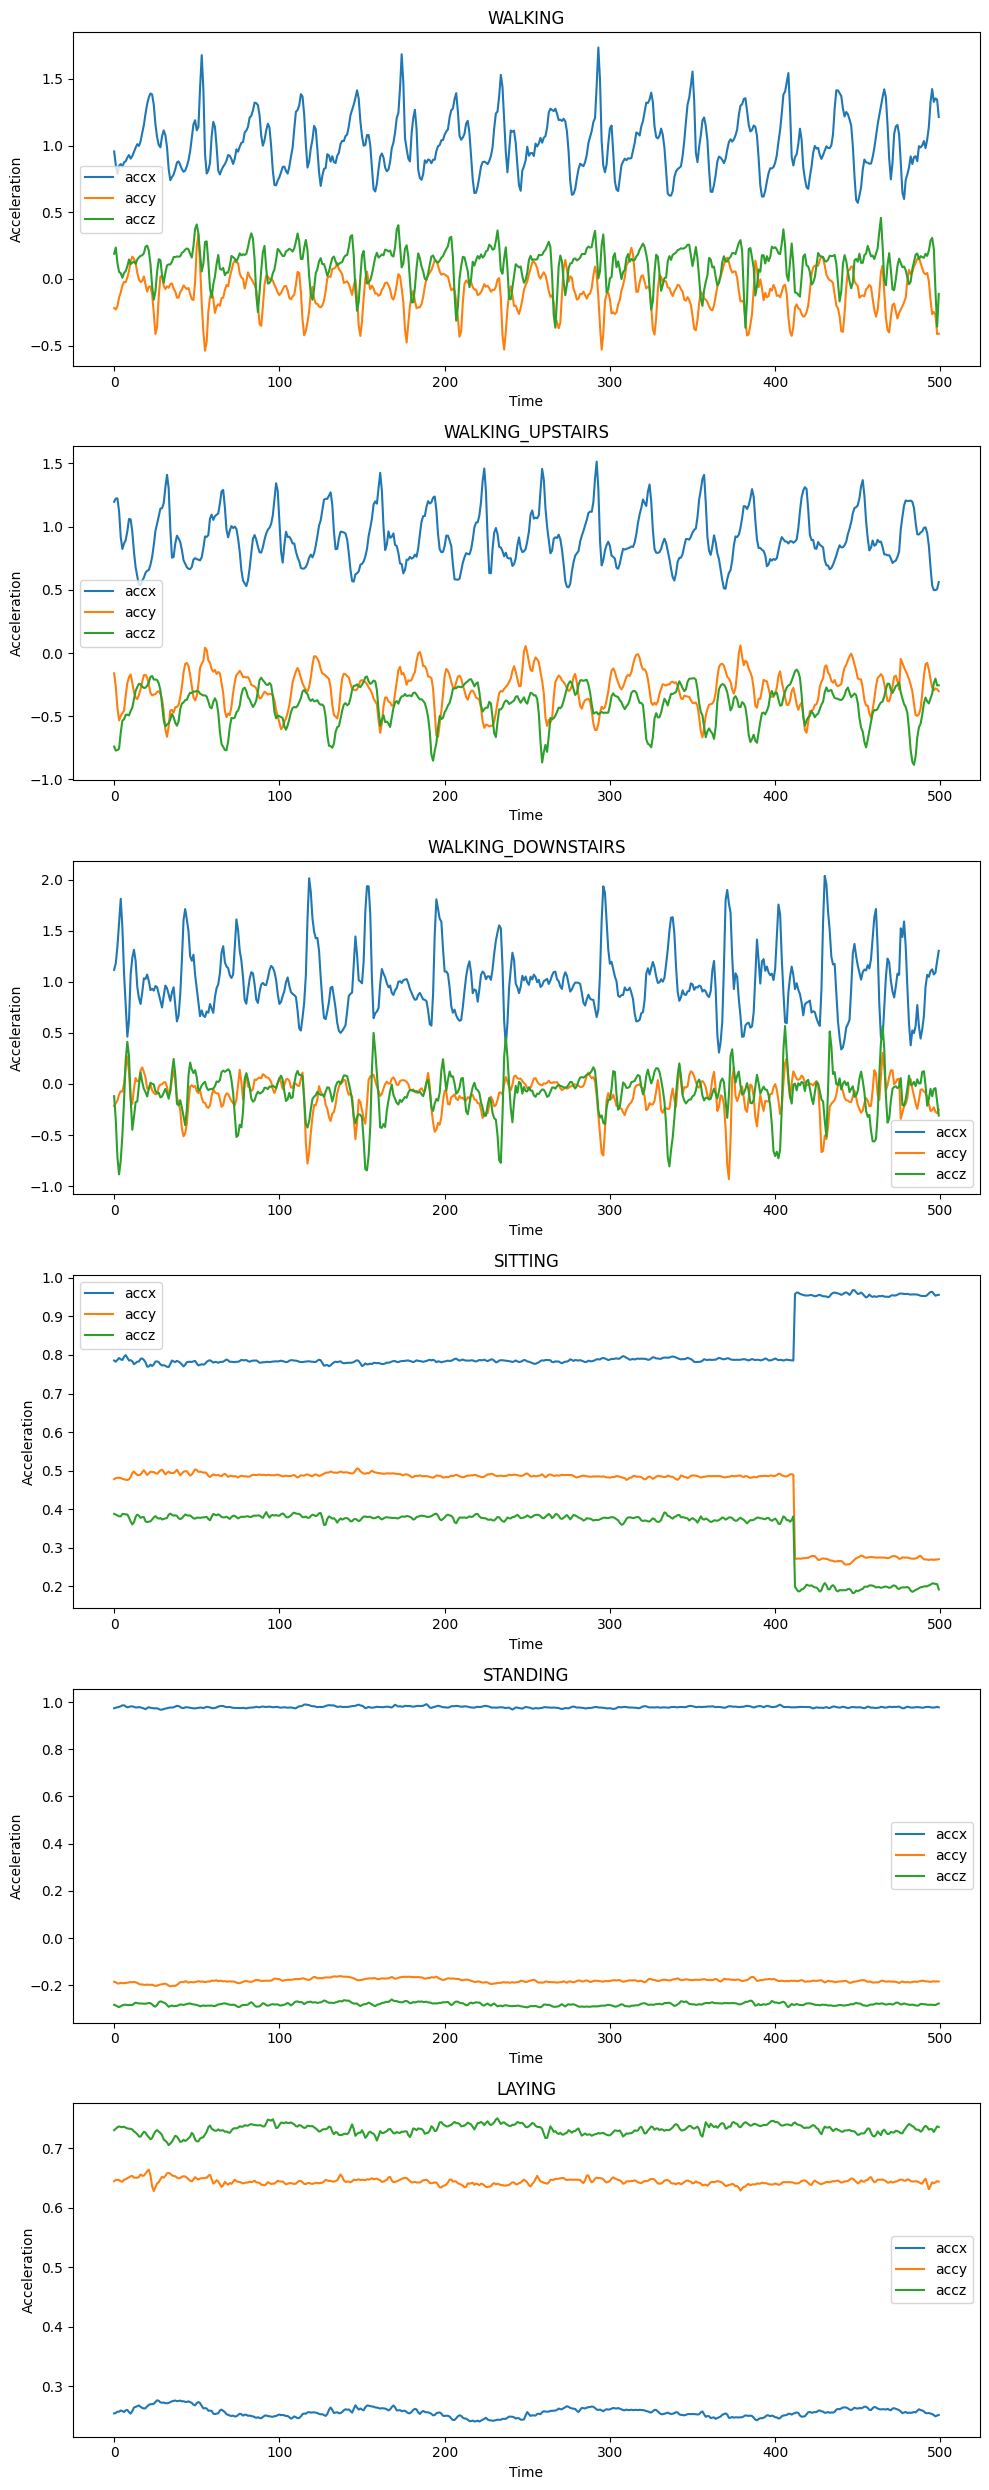

In [8]:
y_train_df = pd.DataFrame(y_train, columns = ['Activity'])
print("Testing data shape: ", y_train.shape)
print("Testing data shape: ", y_train_df.shape)
fig, axes = plt.subplots(6, 1, figsize = (10, 25))

for i in range(len(folders)):
    index = np.where(y_train_df['Activity']==i+1)[0][0]
    
    axes[i].set_title(list(classes.keys())[i])
    axes[i].plot( X_train[index][:, 0], label='accx')
    axes[i].plot(X_train[index][:, 1], label='accy')
    axes[i].plot(X_train[index][:, 2], label='accz')
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Acceleration")
    axes[i].legend()
plt.tight_layout()


Yes, we can see a similarity between the static activities (laying, sitting, standing) in the component wise acceleration graphs that the values hover about a constant without much deviation with respect to time. Whereas, in the plots for the dynamic activities(walking, walking_downstairs, walking_upstairs), we can observe a lot of variations in the component wise acceleration values.

Yes, the model will be able to clearly classify the static activities from the dynamic activities but sub-classification among the two groups might show uncertainties due to the similar nature of their acceleration variations.

1.2

Text(0.5, 1.0, 'Linear accelerations of different activities vs Time')

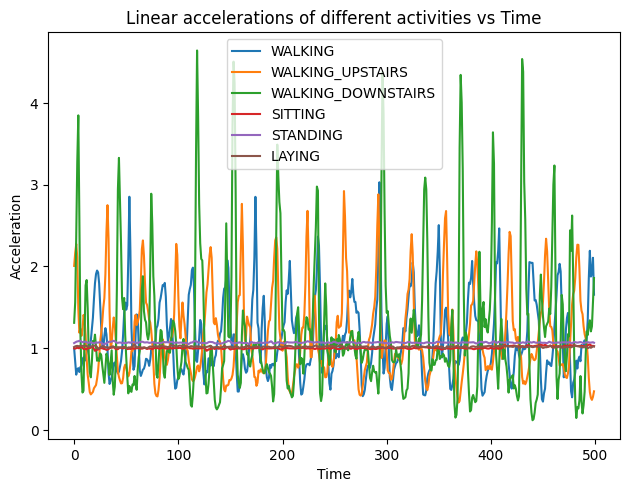

In [9]:
for i in range(len(classes)):
    activity_index = np.where(y_train_df['Activity']==i+1)[0][0]
    
    linear_acc = np.sum(X_train[activity_index]**2, axis = 1)
    plt.plot(linear_acc, label=list(classes.keys())[i])
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.legend()
plt.tight_layout()
plt.title('Linear accelerations of different activities vs Time')

We don't need a machine learning model to distinguish between the broader groups (static and dynamic). The linear acceleration plot shows that static activities have an almost constant linear acceleration, whereas dynamic activities exhibit much greater variation. This difference makes it easy to differentiate between the two groups.

1.3

In [10]:
X_train_sqsum = np.sum(X_train**2, axis = 2)
X_train_sqsum_df = pd.DataFrame(X_train_sqsum)
X_train_sqsum_df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,2.005249,2.160400,2.273817,2.109540,1.480720,1.188538,1.236224,1.148906,1.224590,1.404729,...,1.171789,1.120623,1.052254,0.897080,0.634980,0.462812,0.392290,0.366865,0.404079,0.471275
1,1.013713,1.020845,1.025296,1.027185,1.024007,1.022594,1.026870,1.027072,1.027742,1.027175,...,1.023928,1.030065,1.015616,0.998280,1.006388,1.013092,1.003704,1.011527,1.021394,1.019440
2,1.061579,1.068788,1.076640,1.081619,1.083677,1.089191,1.088519,1.077718,1.072226,1.073787,...,1.065313,1.069200,1.072072,1.072758,1.069753,1.067005,1.067372,1.070067,1.071565,1.065639
3,0.497171,0.558901,0.629017,0.762178,0.754270,0.740479,0.920398,1.090739,1.126387,1.029941,...,1.385321,1.739091,2.384820,2.673074,2.355472,1.995429,1.663886,1.391880,1.428507,1.302203
4,0.526393,0.612953,0.625144,0.617296,0.654806,0.651206,0.767416,0.867818,0.892692,1.003664,...,0.761745,0.679142,0.652467,0.642199,0.636815,0.576609,0.510688,0.563943,0.613582,0.627226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,1.667010,1.683330,1.400401,1.398746,1.443760,1.429334,1.422312,1.272041,1.266330,1.635466,...,0.556597,0.625043,0.718228,0.822178,0.822011,0.734799,0.777650,0.816605,0.869754,1.036154
122,1.030068,1.028156,1.026852,1.031123,1.030664,1.027787,1.030023,1.028752,1.024007,1.024407,...,0.997455,1.003453,1.005665,0.999863,0.990790,0.992914,0.997406,0.995081,0.997205,1.003835
123,1.017618,1.015693,1.008254,1.003586,1.007235,1.019632,1.024020,1.018601,1.018554,1.022413,...,1.012313,1.017458,1.010752,1.007533,1.003922,0.996629,1.002241,1.006147,1.008498,1.019451
124,0.737070,0.742623,0.612213,0.611427,0.618866,0.576885,0.663982,0.715187,0.761910,0.818487,...,0.715990,0.735479,0.709034,0.721843,0.720080,0.607252,0.565186,0.529487,0.528832,0.512845


1.3.1

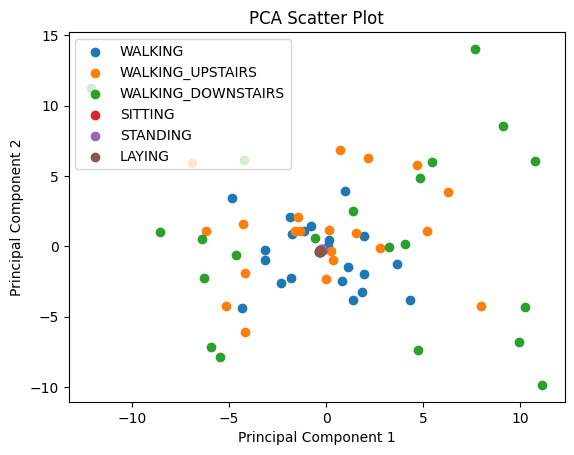

In [11]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train_sqsum_df)
X_train_sqsum_df_reduced = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

data_pca = pd.concat([X_train_sqsum_df_reduced, pd.DataFrame(y_train, columns=['Activity'])], axis = 1)

for i in range(6):
    X = data_pca.where(data_pca['Activity'] == i+1).dropna()['PC1']
    Y = data_pca.where(data_pca['Activity'] == i+1).dropna()['PC2']
    plt.scatter(X,Y, label = list(classes.keys())[i])

plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

1.3.2

In [12]:
import tsfel
from sklearn import preprocessing
cfg = tsfel.get_features_by_domain() # retrieves all features
X_train_featurised = tsfel.time_series_features_extractor(cfg, X_train, fs=50)
X_test_featurised = tsfel.time_series_features_extractor(cfg, X_test, fs=50)

In [13]:
X_train_featurised_df = pd.DataFrame(X_train_featurised)
X_train_featurised_df

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Average power,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,...,2_Wavelet variance_1.39Hz,2_Wavelet variance_1.56Hz,2_Wavelet variance_1.79Hz,2_Wavelet variance_12.5Hz,2_Wavelet variance_2.08Hz,2_Wavelet variance_2.5Hz,2_Wavelet variance_3.12Hz,2_Wavelet variance_4.17Hz,2_Wavelet variance_6.25Hz,2_Zero crossing rate
0,428.119592,9.008919,5.0,42.897755,5.005085,100.0,400.0,0.737727,1.086936,0.002,...,0.278458,0.282583,0.256986,0.003031,0.205745,0.146158,0.091813,0.048763,0.019127,0.0
1,32.768542,2.553859,26.0,3.283421,4.955882,100.0,400.0,0.249165,0.262091,0.002,...,0.054745,0.043540,0.033664,0.000726,0.024878,0.017436,0.011250,0.006362,0.002854,0.0
2,478.627177,9.764364,5.0,47.958635,4.989670,100.0,400.0,0.975656,0.980947,0.002,...,0.008059,0.006496,0.005090,0.000112,0.003810,0.002707,0.001779,0.001033,0.000471,0.0
3,477.002571,9.495337,5.0,47.795849,5.010214,100.0,400.0,0.762545,1.075617,0.002,...,0.161870,0.141281,0.118846,0.002414,0.096627,0.076633,0.055739,0.032279,0.012939,2.0
4,530.466450,10.005161,6.0,53.152951,4.997978,100.0,400.0,0.770530,1.234635,0.002,...,0.171683,0.173379,0.158966,0.002306,0.130545,0.098632,0.068946,0.039795,0.014778,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,497.739114,9.755190,3.0,49.873659,4.944363,100.0,400.0,0.784800,1.202131,0.002,...,0.172218,0.211292,0.224888,0.008518,0.201923,0.152717,0.099159,0.056985,0.033397,10.0
122,340.897228,8.207162,84.0,34.158039,4.595538,100.0,400.0,0.776342,0.926267,0.002,...,0.037584,0.030610,0.023581,0.000269,0.016784,0.010932,0.006364,0.003226,0.001268,0.0
123,17.727040,1.878521,43.0,1.776256,5.013382,100.0,400.0,0.183463,0.192260,0.002,...,0.067166,0.053750,0.041785,0.000921,0.030935,0.021614,0.013854,0.007807,0.003547,0.0
124,430.187347,9.028684,5.0,43.104945,4.914747,100.0,400.0,0.732451,1.062091,0.002,...,0.302889,0.276037,0.233139,0.004168,0.176291,0.119008,0.072771,0.041367,0.020006,8.0


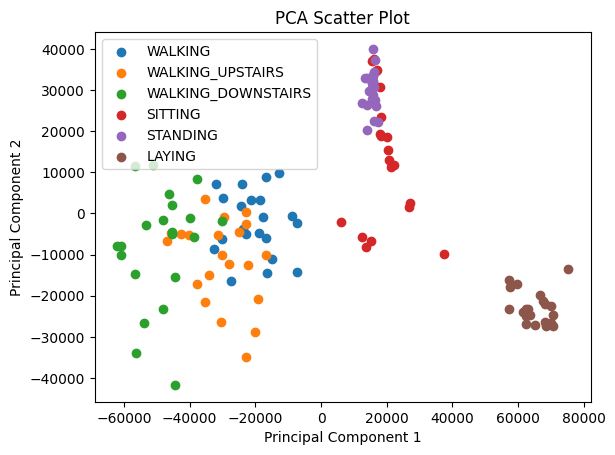

In [14]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train_featurised_df)
X_train_featurised_df_reduced = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

data_pca = pd.concat([X_train_featurised_df_reduced, pd.DataFrame(y_train, columns=['Activity'])], axis = 1)

for i in range(6):
    X = data_pca.where(data_pca['Activity'] == i+1).dropna()['PC1']
    Y = data_pca.where(data_pca['Activity'] == i+1).dropna()['PC2']
    plt.scatter(X,Y, label = list(classes.keys())[i])

plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

1.3.3

In [15]:
X_featured = pd.read_csv("./UCI HAR Dataset/train/X_train.txt", sep='\s+',header=None)
y_featurized = pd.read_csv("./UCI HAR Dataset/train/y_train.txt", sep='\s+',header=None)
print(X_featured .shape)
print(y_featurized.shape)
X_featured_test = pd.read_csv("./UCI HAR Dataset/test/X_test.txt", sep='\s+',header=None)
y_featurized_test = pd.read_csv("./UCI HAR Dataset/test/y_test.txt", sep='\s+',header=None)
print(X_featured_test .shape)
print(y_featurized_test.shape)

(7352, 561)
(7352, 1)
(2947, 561)
(2947, 1)


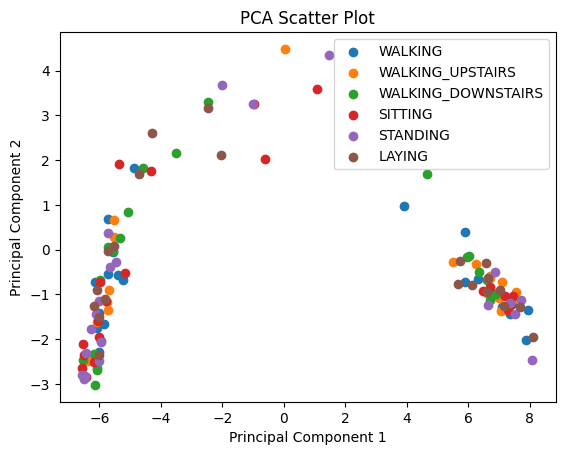

In [16]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_featured)
X_train_reduced = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

data_pca = pd.concat([X_train_reduced, pd.DataFrame(y_train, columns=['Activity'])], axis = 1)

for i in range(6):
    X = data_pca.where(data_pca['Activity'] == i+1).dropna()['PC1']
    Y = data_pca.where(data_pca['Activity'] == i+1).dropna()['PC2']
    plt.scatter(X,Y, label = list(classes.keys())[i])

plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

1.3.4

Observing the graphs we find that TSFEL featured data is better as it groups well then the Total acceleration data groups well. But the features provided by the data set are showing random indistinguishable scatter plot.

1.4

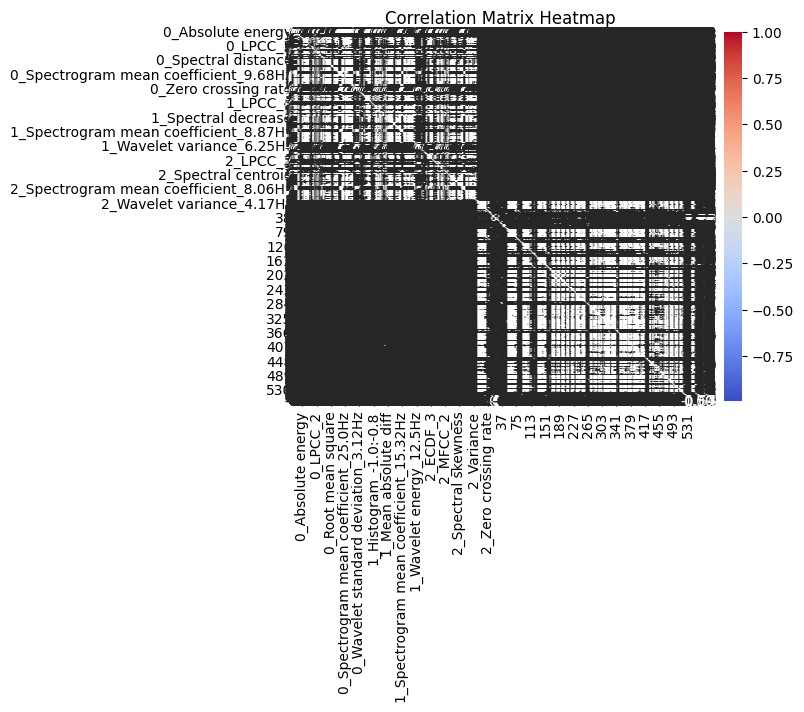

In [17]:
combined_features = pd.concat([X_train_featurised_df, X_featured], axis=1)
correlation_matrix = combined_features.corr()
plt.figure(size=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

2.1

In [18]:
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)
X_test_2d.shape

(54, 1500)

2.1.1

In [19]:
model = DecisionTreeClassifier()
model.fit(X_train_2d, y_train)

y_pred = model.predict(X_test_2d)
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')

recall = recall_score(y_test, y_pred, average='weighted')

conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6111
Precision: 0.6360
Recall: 0.6111

Classification Report:
              precision    recall  f1-score   support

           1       0.36      0.44      0.40         9
           2       0.50      0.56      0.53         9
           3       0.67      0.22      0.33         9
           4       0.57      0.89      0.70         9
           5       0.71      0.56      0.62         9
           6       1.00      1.00      1.00         9

    accuracy                           0.61        54
   macro avg       0.64      0.61      0.60        54
weighted avg       0.64      0.61      0.60        54



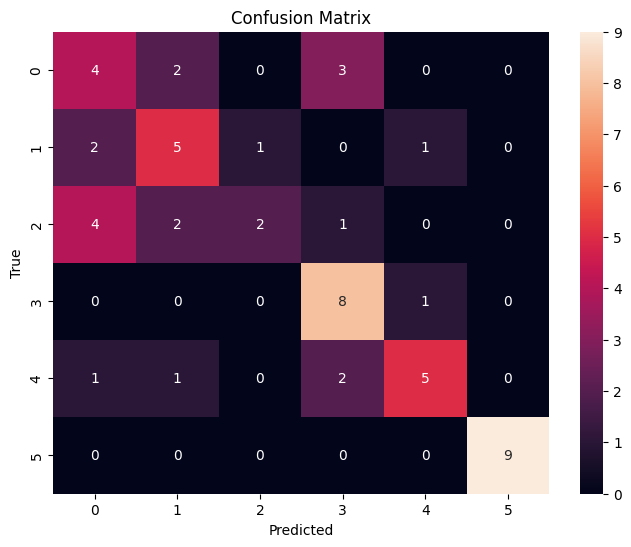

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [21]:
accx_raw = pd.read_csv("./UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt", sep='\s+',header=None)
accy_raw = pd.read_csv("./UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt", sep='\s+',header=None)
accz_raw = pd.read_csv("./UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt", sep='\s+',header=None)
X_train_raw = pd.concat([accx_raw, accy_raw, accz_raw], axis=1)
X_train_raw
accx_raw = pd.read_csv("./UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt", sep='\s+',header=None)
accy_raw = pd.read_csv("./UCI HAR Dataset/test/Inertial Signals/body_acc_y_test.txt", sep='\s+',header=None)
accz_raw = pd.read_csv("./UCI HAR Dataset/test/Inertial Signals/body_acc_z_test.txt", sep='\s+',header=None)
X_test_raw = pd.concat([accx_raw, accy_raw, accz_raw], axis=1)
X_test_raw

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.011653,0.013109,0.011269,0.027831,0.002318,-0.018965,-0.061920,-0.094248,-0.079534,-0.070084,...,0.013516,0.011921,0.008017,0.006266,0.005892,0.004357,0.003094,0.003666,0.004042,0.004888
1,0.009280,0.004930,0.003954,0.009214,0.016156,0.014079,0.013105,0.021247,0.026823,0.031054,...,-0.005980,-0.006717,-0.007368,-0.007049,0.000645,0.008908,0.014212,0.014129,0.001338,-0.017039
2,0.005732,0.007066,0.005110,0.002434,0.002024,0.001382,0.001930,0.004875,0.003776,0.002400,...,-0.003469,-0.002505,-0.000020,0.002584,-0.000619,-0.001921,-0.001425,-0.002501,-0.002525,-0.003140
3,0.000452,0.000604,-0.002485,-0.004562,-0.006002,-0.006382,-0.005276,-0.001489,0.005153,0.004951,...,-0.006584,-0.007691,-0.007036,-0.005809,-0.010398,-0.014426,-0.013055,-0.015742,-0.020686,-0.019650
4,-0.004362,-0.002765,-0.004905,-0.004682,-0.000267,0.004135,0.005626,0.000933,-0.001542,0.003020,...,0.006975,0.003845,0.004299,-0.000475,-0.002874,0.004246,0.008320,0.005013,0.001785,0.002186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.107662,0.124079,0.183420,0.289247,0.393799,0.446456,0.436931,0.363053,0.279962,0.152701,...,-0.143396,-0.116144,-0.087929,-0.103961,-0.169936,-0.164661,-0.115066,-0.095382,-0.020661,0.003593
2943,-0.042392,-0.017244,0.015269,0.064482,0.086802,0.084482,0.101578,0.130484,0.208370,0.310620,...,-0.075834,-0.011423,-0.003515,0.000792,0.035538,0.077283,0.037203,-0.127002,-0.271737,-0.261478
2944,-0.147647,-0.169903,-0.168698,-0.138600,-0.144781,-0.072979,-0.040348,-0.023016,-0.025176,-0.074406,...,0.248332,0.225450,0.168299,0.072824,-0.018588,-0.042316,-0.045914,-0.023219,0.181495,0.387035
2945,0.071227,-0.088665,-0.070675,-0.116887,-0.214117,-0.219928,-0.275024,-0.229062,-0.245309,-0.242260,...,0.083374,0.111729,0.157176,0.225134,0.223744,0.202966,0.242349,0.238392,0.130228,-0.034023


2.1.2

In [31]:
model = DecisionTreeClassifier()
model.fit(X_train_featurised_df, y_train)
y_pred = model.predict(X_test_featurised)
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')

recall = recall_score(y_test, y_pred, average='weighted')

conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9074
Precision: 0.9129
Recall: 0.9074

Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.78      0.82         9
           2       0.73      0.89      0.80         9
           3       0.88      0.78      0.82         9
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         9

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54



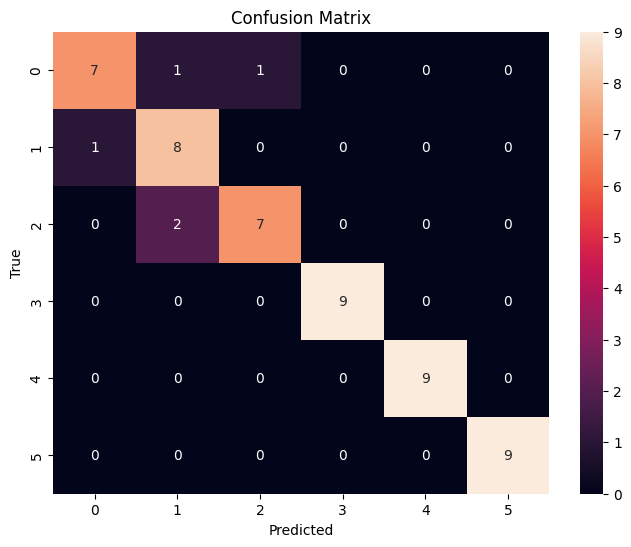

In [32]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

2.1.3

In [33]:
model = DecisionTreeClassifier()
model.fit(X_featured, y_featurized)

y_pred = model.predict(X_featured_test)
accuracy = accuracy_score(y_featurized_test, y_pred)

precision = precision_score(y_featurized_test, y_pred, average='weighted')

recall = recall_score(y_featurized_test, y_pred, average='weighted')

conf_matrix = confusion_matrix(y_featurized_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

print("\nClassification Report:")
print(classification_report(y_featurized_test, y_pred))

Accuracy: 0.8521
Precision: 0.8526
Recall: 0.8521

Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.88      0.85       496
           2       0.79      0.76      0.78       471
           3       0.87      0.83      0.85       420
           4       0.83      0.76      0.79       491
           5       0.79      0.86      0.82       532
           6       1.00      1.00      1.00       537

    accuracy                           0.85      2947
   macro avg       0.85      0.85      0.85      2947
weighted avg       0.85      0.85      0.85      2947



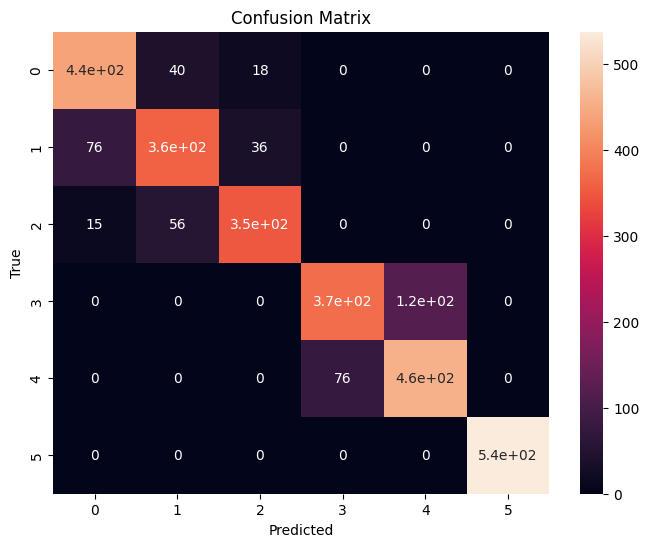

In [34]:
conf_matrix = confusion_matrix(y_featurized_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

2.1.4

The raw accelerometer data performed bad relatively and it makes sense because it is not processed. In the featured and TSFEL data almost both performed similarly.

2.2.1

The accuracy of the Decision Tree of depth 2 is 0.42592592592592593
The accuracy of the Decision Tree of depth 3 is 0.5370370370370371
The accuracy of the Decision Tree of depth 4 is 0.5925925925925926
The accuracy of the Decision Tree of depth 5 is 0.5925925925925926
The accuracy of the Decision Tree of depth 6 is 0.6666666666666666
The accuracy of the Decision Tree of depth 7 is 0.5740740740740741
The accuracy of the Decision Tree of depth 8 is 0.6296296296296297


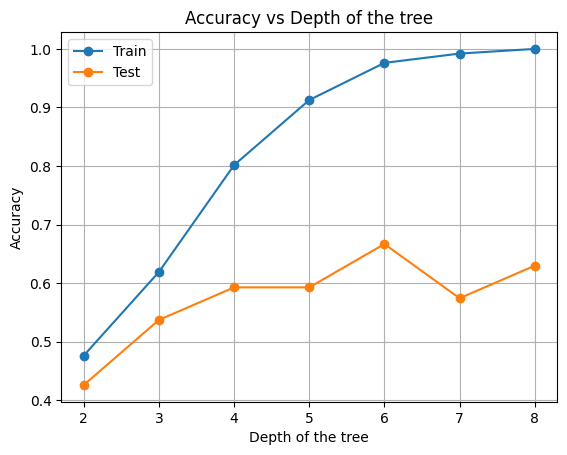

In [28]:
accuracies_test = []
accuracies_train = []

for i in range(2, 9):
    X_train_2d = X_train.reshape(X_train.shape[0], -1)
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_train_2d, y_train)
    y_pred = model.predict(X_test_2d)
    accuracy_test = accuracy_score(y_test, y_pred)
    accuracies_test.append(accuracy_test)
    print(f"The accuracy of the Decision Tree of depth {i} is {accuracy_test}")

    
    y_pred_train = model.predict(X_train_2d)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracies_train.append(accuracy_train)

plt.plot(np.arange(2, 9), accuracies_train, marker='o', label='Train')
plt.plot(np.arange(2, 9), accuracies_test, marker='o', label='Test')
plt.xlabel("Depth of the tree")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Depth of the tree")
plt.legend()
plt.grid()

2.2.2

The accuracy of the Decision Tree of depth 2 is 0.5
The accuracy of the Decision Tree of depth 3 is 0.7407407407407407
The accuracy of the Decision Tree of depth 4 is 0.8703703703703703
The accuracy of the Decision Tree of depth 5 is 0.9074074074074074
The accuracy of the Decision Tree of depth 6 is 0.8888888888888888
The accuracy of the Decision Tree of depth 7 is 0.8518518518518519
The accuracy of the Decision Tree of depth 8 is 0.9074074074074074


C:\Users\ganes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\ganes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\ganes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\ganes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\b

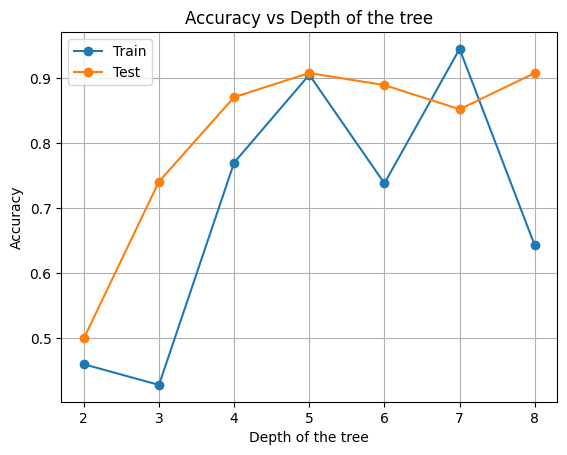

In [29]:
accuracies_test = []
accuracies_train = []

for i in range(2, 9):
    X_train_2d = X_train_featurised.reshape(X_train_featurised.shape[0], -1)
    
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_train_featurised_df, y_train)

    y_pred = model.predict(X_test_featurised)
    accuracy_test = accuracy_score(y_test, y_pred)
    accuracies_test.append(accuracy_test)
    print(f"The accuracy of the Decision Tree of depth {i} is {accuracy_test}")

    
    y_pred_train = model.predict(X_train_2d)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracies_train.append(accuracy_train)

plt.plot(np.arange(2, 9), accuracies_train, marker='o', label='Train')
plt.plot(np.arange(2, 9), accuracies_test, marker='o', label='Test')
plt.xlabel("Depth of the tree")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Depth of the tree")
plt.legend()
plt.grid()

2.2.3

The accuracy of the Decision Tree of depth 2 is 0.5310485239226331
The accuracy of the Decision Tree of depth 3 is 0.7224295894129623
The accuracy of the Decision Tree of depth 4 is 0.8096369189005769
The accuracy of the Decision Tree of depth 5 is 0.838140481845945
The accuracy of the Decision Tree of depth 6 is 0.8568035290125552
The accuracy of the Decision Tree of depth 7 is 0.8646080760095012
The accuracy of the Decision Tree of depth 8 is 0.8727519511367492
The accuracy of the Decision Tree of depth 9 is 0.8686800135731252
The accuracy of the Decision Tree of depth 10 is 0.8707159823549372
The accuracy of the Decision Tree of depth 11 is 0.8659653885307091
The accuracy of the Decision Tree of depth 12 is 0.8680013573125213
The accuracy of the Decision Tree of depth 13 is 0.8585001696640652
The accuracy of the Decision Tree of depth 14 is 0.8635900916185952


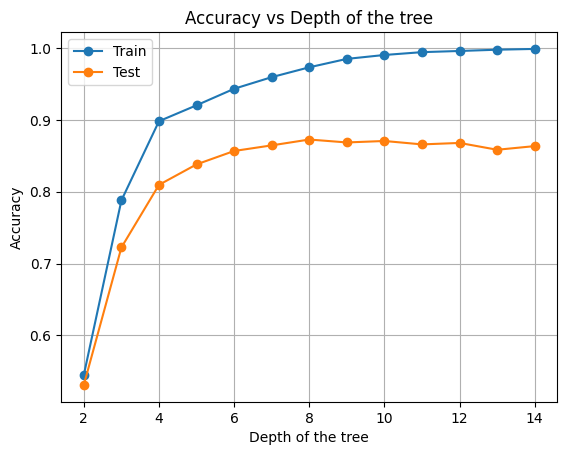

In [30]:
accuracies_test = []
accuracies_train = []

for i in range(2, 15):
    X_featured = np.array(X_featured)
    X_train_2d = X_featured.reshape(X_featured.shape[0], -1)
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_featured, y_featurized)

    y_pred = model.predict(X_featured_test)
    accuracy_test = accuracy_score(y_featurized_test, y_pred)
    accuracies_test.append(accuracy_test)
    print(f"The accuracy of the Decision Tree of depth {i} is {accuracy_test}")

    
    y_pred_train = model.predict(X_train_2d)
    accuracy_train = accuracy_score(y_featurized, y_pred_train)
    accuracies_train.append(accuracy_train)

plt.plot(np.arange(2, 15), accuracies_train, marker='o', label='Train')
plt.plot(np.arange(2, 15), accuracies_test, marker='o', label='Test')
plt.xlabel("Depth of the tree")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Depth of the tree")
plt.legend()
plt.grid()

2.3

Almost all the models performed well only. But the optimal depth for raw data is substantialy more.

The  model trained on TSFEL worked well than other models. So TSFEL version is better to use.
So preprocessing and featurization is needed for good results.